In [1]:
pip install pystan fbprophet

     |████████████████████████████████| 64 kB 233 kB/s eta 0:00:01
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=716653 sha256=57f323003bd8e43158d4d95562a56a4b13e8b1538108f9c4d105ef298e838c41
  Stored in directory: /Users/mayankmohta/Library/Caches/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68
You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pippip install --upgrade pip

  Using cached pip-21.3.1-py3-none-any.whl (1.7 MB)
     |████████████████████████████████| 3.6 MB 578 kB/s eta 0:00:01     |██████████████▎                 | 1.6 MB 575 kB/s eta 0:00:04
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install pystan fbprophet

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [5]:
import pandas as pd

In [7]:
from fbprophet import Prophet

In [9]:
df = pd.read_csv('/Users/mayankmohta/Downloads/.csv')

In [10]:
df.head()

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,"Nov 17, 2021",530.15,NaN,NaN,NaN,NaN,NaN
1,"Nov 16, 2021",519.05,NaN,NaN,NaN,NaN,NaN
2,"Nov 15, 2021",505.45,NaN,NaN,NaN,NaN,NaN
3,"Nov 12, 2021",507.05,NaN,NaN,NaN,NaN,NaN
4,"Nov 11, 2021",503.45,NaN,NaN,NaN,NaN,NaN


In [11]:
df.tail()

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
708,"Jan 07, 2019",175.35,NaN,NaN,NaN,NaN,NaN
709,"Jan 04, 2019",170.95,NaN,NaN,NaN,NaN,NaN
710,"Jan 03, 2019",166.05,NaN,NaN,NaN,NaN,NaN
711,"Jan 02, 2019",168.55,NaN,NaN,NaN,NaN,NaN
712,"Jan 01, 2019",173.45,NaN,NaN,NaN,NaN,NaN


In [12]:
df.describe()

,TOTAL_SALES
count,160086.000000
mean,58.058909
std,68.715539
min,0.000000
25%,26.400000
50%,39.000000
75%,67.940000
max,4480.000000


In [13]:
df.dtypes

Date           object
Price         float64
Unnamed: 2    float64
Unnamed: 3    float64
Unnamed: 4    float64
Unnamed: 5    float64
Unnamed: 6    float64
dtype: object

In [14]:
df.columns = ['ds','y']

In [19]:
df.head()


,ds,y
0,2019-01-01 00:02:34.000 +0000,102.40
1,2019-01-01 00:10:30.000 +0000,198.00
2,2019-01-01 00:19:50.000 +0000,69.50
3,2019-01-01 00:21:28.000 +0000,25.44
4,2019-01-01 01:15:59.000 +0000,33.87


In [20]:
df['ds'] = pd.to_datetime(df['ds'])

In [24]:
df.dtypes

ds    datetime64[ns, UTC]
y                 float64
dtype: object

In [27]:
df['ds'] = pd.to_datetime(df['ds']).dt.date

In [48]:
model = Prophet(daily_seasonality=True)

In [51]:
model.fit(df)

In [52]:
future_dates = model.make_future_dataframe(periods=365)

In [53]:
prediction = model.predict(future_dates)

In [54]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,95.008633,-25.202873,143.198691,95.008633,95.008633,-38.707589,-38.707589,-38.707589,-29.553444,...,-2.072940,-2.072940,-2.072940,-7.081205,-7.081205,-7.081205,0.0,0.0,0.0,56.301044
1,2019-01-02,94.997922,-29.794948,147.758179,94.997922,94.997922,-36.606660,-36.606660,-36.606660,-29.553444,...,-0.169524,-0.169524,-0.169524,-6.883692,-6.883692,-6.883692,0.0,0.0,0.0,58.391262
2,2019-01-03,94.987210,-20.300515,146.787991,94.987210,94.987210,-37.597252,-37.597252,-37.597252,-29.553444,...,-1.359439,-1.359439,-1.359439,-6.684369,-6.684369,-6.684369,0.0,0.0,0.0,57.389958
3,2019-01-04,94.976498,-26.428663,146.221843,94.976498,94.976498,-35.880310,-35.880310,-35.880310,-29.553444,...,0.158074,0.158074,0.158074,-6.484939,-6.484939,-6.484939,0.0,0.0,0.0,59.096188
4,2019-01-05,94.965786,-21.654517,145.365800,94.965786,94.965786,-32.424547,-32.424547,-32.424547,-29.553444,...,3.416036,3.416036,3.416036,-6.287139,-6.287139,-6.287139,0.0,0.0,0.0,62.541240


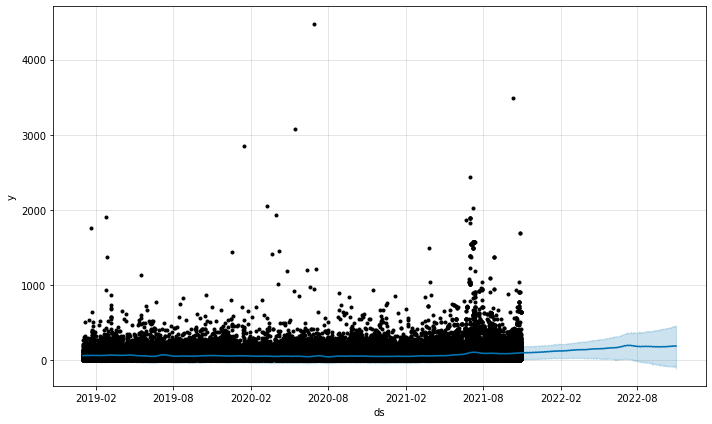

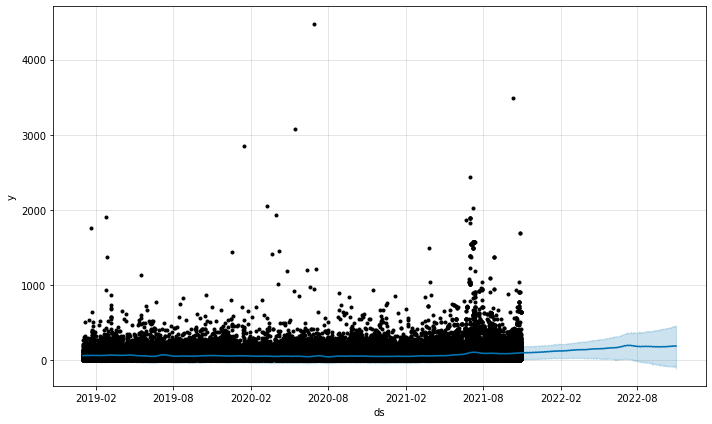

In [55]:
model.plot(prediction)

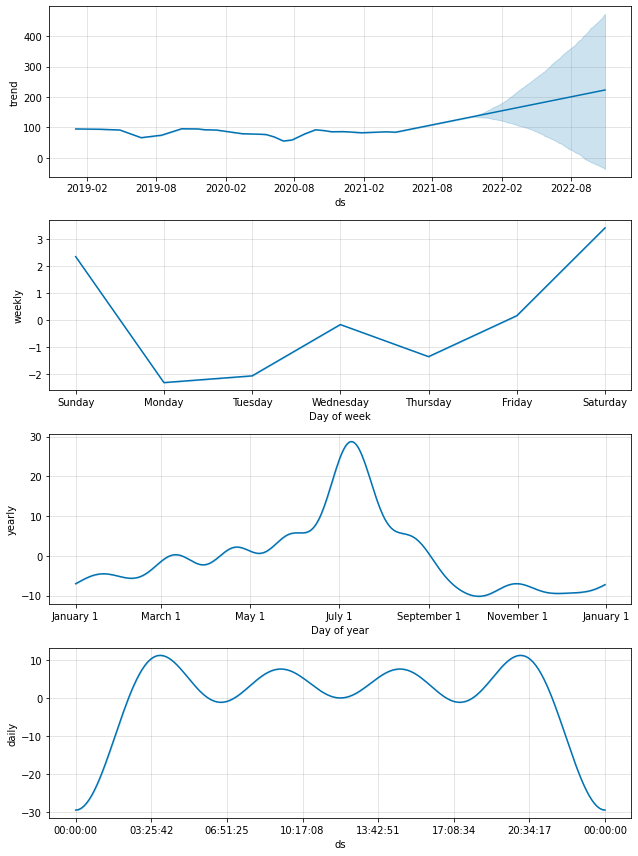

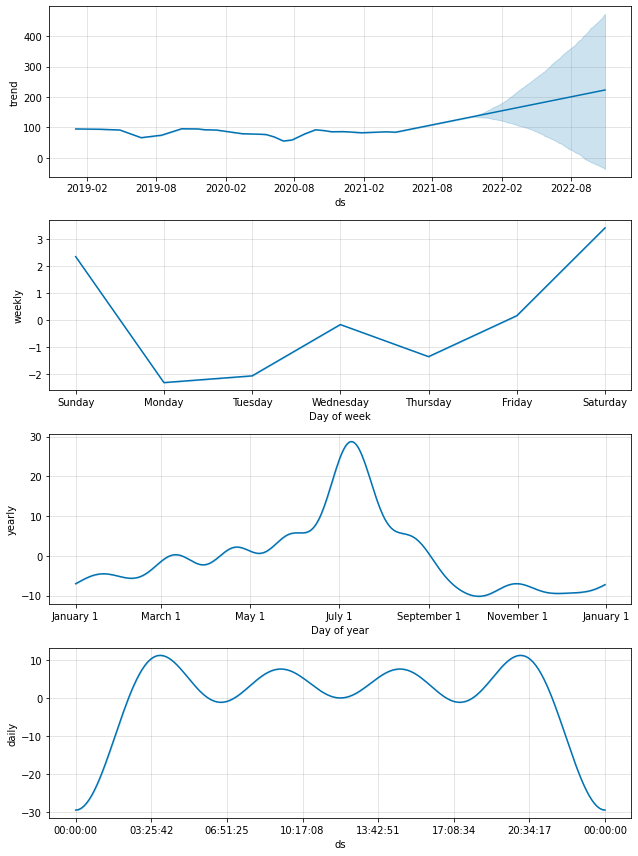

In [56]:
model.plot_components(prediction)